In [1]:
import sys
from pathlib import Path
import pandas as pd

# Add project root (MarketMicrostructure) to sys.path
ROOT = Path.cwd().parent          # since cwd is probably .../MarketMicrostructure/src
sys.path.append(str(ROOT))

from settings import DATA_DIR, OUTPUT_DIR
import matplotlib.pyplot as plt

In [2]:
stocks = ['0050', '0056', '2330']

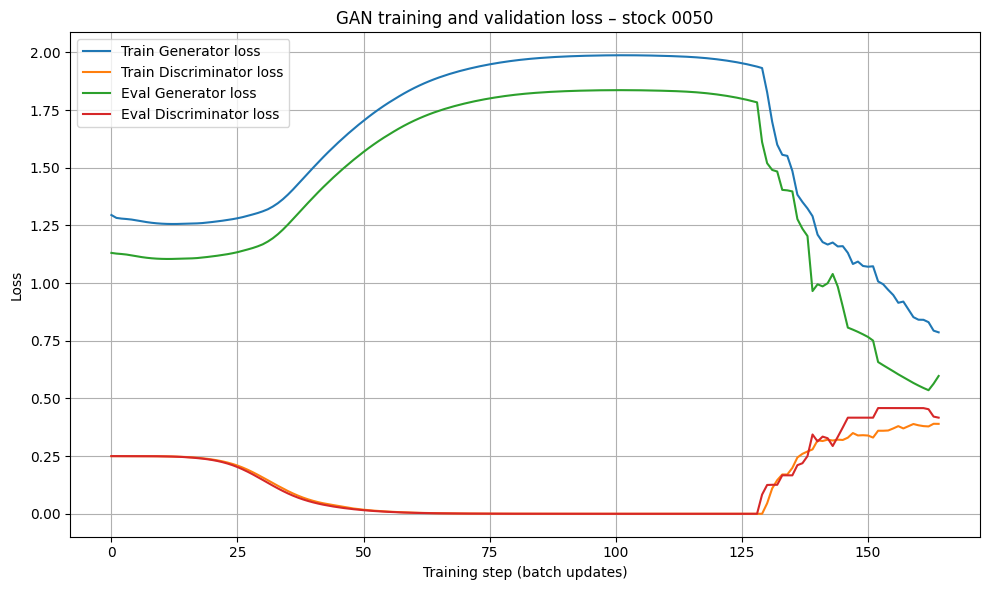

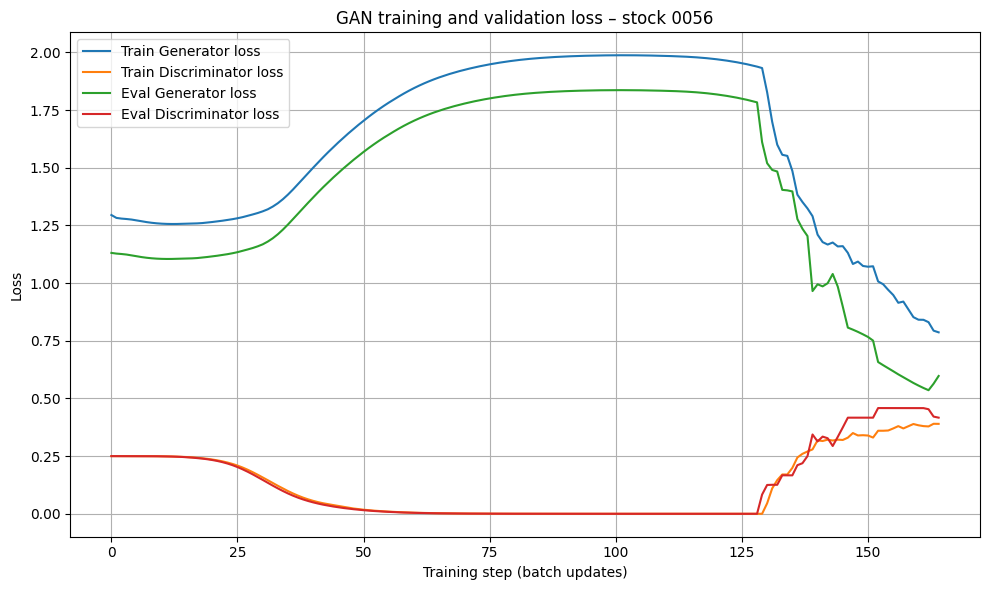

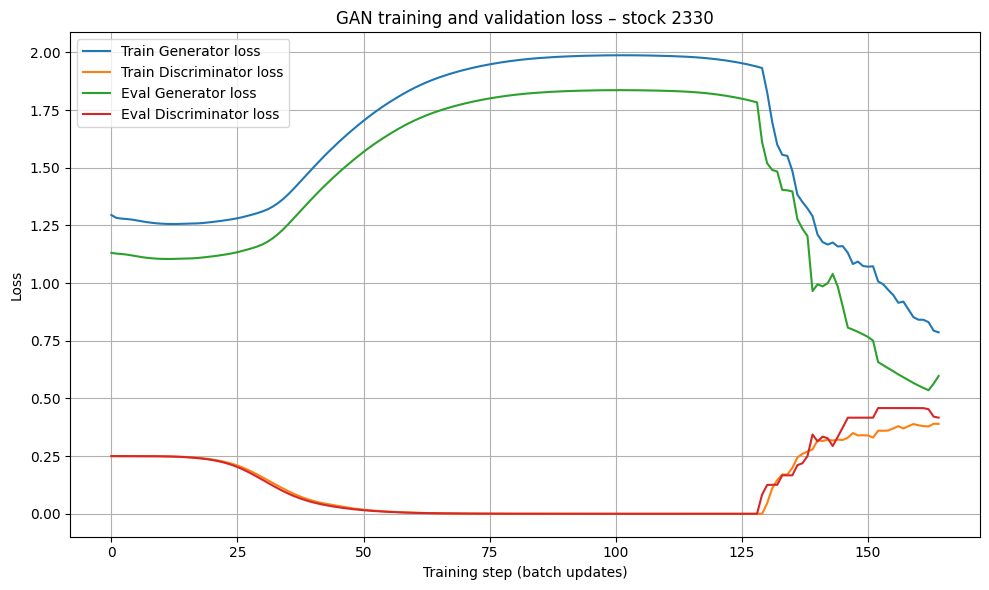

In [3]:
stocks = ['0050', '0056', '2330']

for stock in stocks:

    file_eval = '/Users/kunjshah/Downloads/MarketMicrostructure/output_train/0050_eval_g_d.csv'
    eval = pd.read_csv(file_eval, index_col=0)

    file_train = '/Users/kunjshah/Downloads/MarketMicrostructure/output_train/0050_train_g_d.csv'
    train = pd.read_csv(file_train, index_col=0)


    # Extract as numpy arrays
    train_g = train.loc['train_g'].values
    train_d = train.loc['train_d'].values
    eval_g  = eval.loc['eval_g'].values
    eval_d  = eval.loc['eval_d'].values



    steps = range(len(train_g))  # x-axis = update steps

    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_g, label="Train Generator loss")
    plt.plot(steps, train_d, label="Train Discriminator loss")
    plt.plot(steps, eval_g,  label="Eval Generator loss")
    plt.plot(steps, eval_d,  label="Eval Discriminator loss")

    plt.xlabel("Training step (batch updates)")
    plt.ylabel("Loss")
    plt.title(f"GAN training and validation loss – stock {stock}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Blue: The generator is learning how bid/ask levels evolve each minute, including the shape of the book, volume pressure, and microstructure patterns.

Orange: The discriminator is the teacher grading the forgery.
The orange line shows how wrong the teacher is when judging the student’s practice fakes.

Green:This means the generator isn’t memorizing one day’s order flow —
it can reproduce general LOB structure across different trading days, including:
	•	intraday liquidity cycles
	•	depth imbalances
	•	minute-to-minute volatility

Red:
This means the discriminator truly understands the microstructure rules of the LOB, not just the quirks of the training days:



Here it is in one paragraph, ultra-simple:

The blue line shows how bad the generator is at faking LOBs — it improves.
The orange line shows how well the discriminator catches the fakes — very strong.
The green line shows how well the generator fakes LOBs on new days — also improves.
The red line shows how well the discriminator catches fakes on new days — very consistent.
Together, the lines show the two models reaching a balance where the generator creates more realistic LOB snapshots and the discriminator gets just hard enough to challenge it.